#Actividad 2 - Explorando bases

Frida Cano Falcón - A01752953

## Extracción de datos

In [80]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
%cd "/content/drive/MyDrive/7mo Semestre/Estadistica"
!ls

/content/drive/MyDrive/Semestres/7mo Semestre/Estadistica
Act1_Distribuciones_FridaCano_A01752953.ipynb	mc-donalds-menu-1.csv
Act2_ExplorandoBases_FridaCano_A01752953.ipynb


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.stats import anderson, skew, kurtosis, norm, gaussian_kde

In [83]:
data_base = pd.read_csv('mc-donalds-menu-1.csv')
data_base.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### Variables a analizar

*   Calorías
*   Azúcares



In [84]:
col2var = ["Calories","Sugars"]
data = data_base[col2var]
print(data)

     Calories  Sugars
0         300       3
1         250       3
2         370       2
3         450       2
4         400       2
..        ...     ...
255       510      64
256       690      85
257       340      43
258       810     103
259       410      51

[260 rows x 2 columns]


## Análisis de Normalidad

### Pruebas de Normalidad

In [85]:
# Prueba de normalidad Anderson - Darling
# Prueba a la columna 'Calories'
calories_result = anderson(data["Calories"])
print(f"Anderson-Darling test for 'Calories':\n"
      f"Statistic: {calories_result.statistic}\n"
      f"Critical Values: {calories_result.critical_values}\n"
      f"Significance Level: {calories_result.significance_level}")

# Prueba a la columna 'Sugars'
sugars_result = anderson(data["Sugars"])
print(f"\nAnderson-Darling test for 'Sugars':\n"
      f"Statistic: {sugars_result.statistic}\n"
      f"Critical Values: {sugars_result.critical_values}\n"
      f"Significance Level: {sugars_result.significance_level}")

Anderson-Darling test for 'Calories':
Statistic: 2.508797646753692
Critical Values: [0.567 0.646 0.775 0.904 1.076]
Significance Level: [15.  10.   5.   2.5  1. ]

Anderson-Darling test for 'Sugars':
Statistic: 9.989946184037649
Critical Values: [0.567 0.646 0.775 0.904 1.076]
Significance Level: [15.  10.   5.   2.5  1. ]


a través del método de Anderson - Darling se comprueba que los datos no siguen una distribución normal, en este caso, el estadístico de prueba es 2.508797646753692 y 9.98, y los valores críticos son [0.567, 0.646, 0.775, 0.904, 1.076]. Dado que el estadístico de prueba es mayor que todos los valores críticos, puedes concluir que los datos no siguen una distribución normal a un nivel de significancia determinado.

### Gráficas

<Figure size 600x300 with 0 Axes>

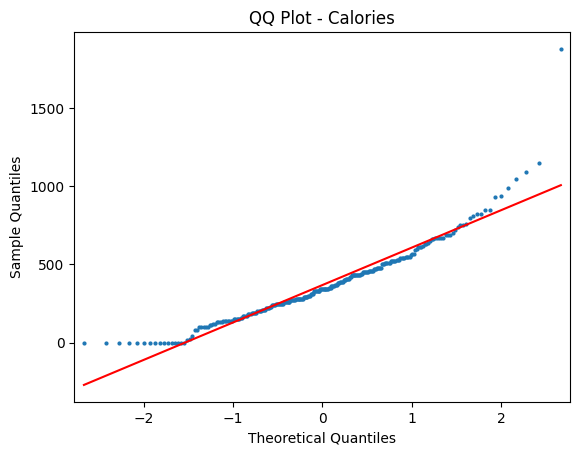

In [86]:
# Crear Q-Q plots para ambas variables
plt.figure(figsize=(6, 3))
sm.qqplot(data['Calories'], line='s', markersize=2)
plt.title("QQ Plot - Calories")
plt.show()

<Figure size 600x300 with 0 Axes>

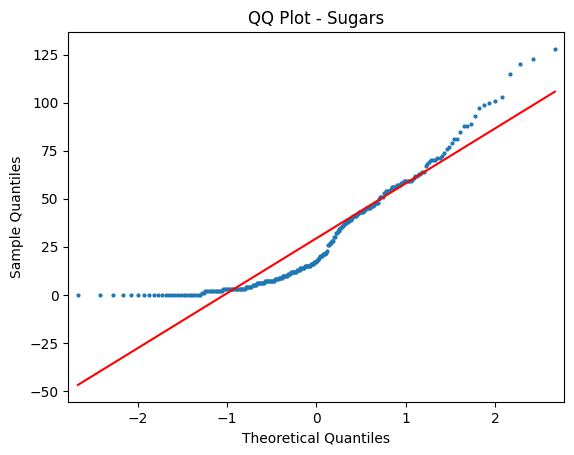

In [87]:
plt.figure(figsize=(6, 3))
sm.qqplot(data['Sugars'], line='s', markersize=2)
plt.title("QQ Plot - Sugars")
plt.show()

### Calculo de sesgo y el coeficiente de curtosis

In [88]:
# Calorias
sesgo_cal = skew(data["Calories"])
curt_cal = kurtosis(data["Calories"])
print("Sesgo de 'Calories':", sesgo_cal)
print("Curtosis de 'Calories':", curt_cal)
# Azúcares
sesgo_sug = skew(data["Sugars"])
curt_sug = kurtosis(data["Sugars"])
print("\nSesgo de 'Sugars':", sesgo_sug)
print("Curtosis de 'Sugars':", curt_sug)

Sesgo de 'Calories': 1.4441049105101538
Curtosis de 'Calories': 5.645273870478668

Sesgo de 'Sugars': 1.025977207076316
Curtosis de 'Sugars': 0.48774420501021654


### Comparar las medidas de media, mediana y rango medio

In [89]:
# Medidas Calorías
media_cal = np.mean(data["Calories"])
mediana_cal = np.median(data["Calories"])
rm_cal = (np.min(data["Calories"]) + np.max(data["Calories"]))/2

print("Media de 'Calories': ",media_cal)
print("Mediana de 'Calories': ",mediana_cal)
print("Rango medio de 'Calories': ",rm_cal)

# Medidas Azúcares
media_sug = np.mean(data["Sugars"])
mediana_sug = np.median(data["Sugars"])
rm_sug = (np.min(data["Sugars"]) + np.max(data["Sugars"]))/2

print("\nMedia de 'Sugars': ",media_sug)
print("Mediana de 'Sugars': ",mediana_sug)
print("Rango medio de 'Sugars': ",rm_sug)

Media de 'Calories':  368.2692307692308
Mediana de 'Calories':  340.0
Rango medio de 'Calories':  940.0

Media de 'Sugars':  29.423076923076923
Mediana de 'Sugars':  17.5
Rango medio de 'Sugars':  64.0


### Histograma y distribución teórica de probabilidad

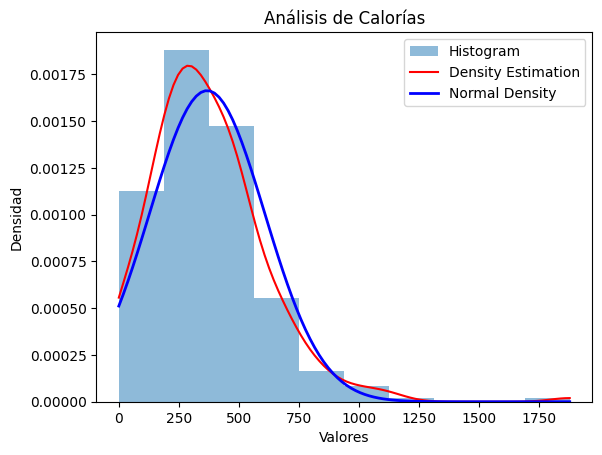

In [90]:
# Calorías
# Crear histograma
plt.hist(data["Calories"], density=True, alpha=0.5, label="Histogram")

# Calcular la densidad estimada
density_cal = gaussian_kde(data["Calories"])
x_cal = np.linspace(np.min(data["Calories"]), np.max(data["Calories"]), 100)
plt.plot(x_cal, density_cal(x_cal), color="red", label="Density Estimation")

# Crear la curva de densidad normal
mu_cal, sigma_cal = np.mean(data["Calories"]), np.std(data["Calories"])
normal_curve_cal = norm.pdf(x_cal, mu_cal, sigma_cal)
plt.plot(x_cal, normal_curve_cal, color="blue", linewidth=2, label="Normal Density")

plt.legend()
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Análisis de Calorías")
plt.show()

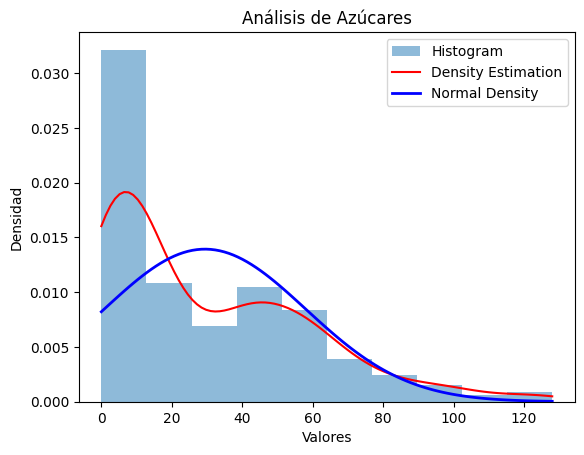

In [91]:
# Azúcares
# Crear histograma
plt.hist(data["Sugars"], density=True, alpha=0.5, label="Histogram")

# Calcular la densidad estimada
density_sug = gaussian_kde(data["Sugars"])
x_sug = np.linspace(np.min(data["Sugars"]), np.max(data["Sugars"]), 100)
plt.plot(x_sug, density_sug(x_sug), color="red", label="Density Estimation")

# Crear la curva de densidad normal
mu_sug, sigma_sug = np.mean(data["Sugars"]), np.std(data["Sugars"])
normal_curve_sug = norm.pdf(x_sug, mu_sug, sigma_sug)
plt.plot(x_sug, normal_curve_sug, color="blue", linewidth=2, label="Normal Density")

plt.legend()
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Análisis de Azúcares")
plt.show()

Gracias a estas proyecciones rendimos cuenta que las distribuciones de estos datos no están normalizados, se ve que para ambas variables de los datos están sesgados a la izquierda. No hay datos distribuidos conforme a la media de los posibles valores y gracias a la función de estimación rendimos cuenta de ello.